In [8]:
### import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pkg.utils import seir, modified_seir, run_modified_seir, plot_timeseries

# Time-Series Plots

Here we generate time-series plots using a specific $R_{0,V}$ value and vaccine efficacy, to model and compare the population dynamics of the two modes of vaccine failure - Leaky and All-or-Nothing. The following 9 regimes governed by the timing and maximum coverage of vaccination were investigated:
- Pre-transmission Vaccination, Coverage Below $f^*_V$ 
- Pre-transmission Vaccination, Coverage Slightly Above $f^*_V$
- Pre-transmission Vaccination, Coverage Above $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Below $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Slightly Above $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Above $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Below $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Slightly Above $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Above $f^*_V$

Recall that $f^*_V$ represents the critical vaccination threshold and is defined as: 

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0}) $$

for instantaneous vaccination before the epidemic starts, and 

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0(1 - f_R)})$$

for instantaneous vaccination after the epidemic starts. 

Based on the contour plot and surface plot, let $R_{0,V} = 2.5$ and $\epsilon_L = 0.6$ (Leaky) or $\epsilon_A = 0.6$ (All-or-Nothing). The simulation was run for 200 days with the following parameter values and initial conditions: $\beta = 2.5/4$, $\gamma = 1/4$, $\sigma=1/4$, $S(0) = 0.98$ $E(0) = 0.01$, $I(0) = 0.01$, $R(0) = 0$.

## Pre-transmission Vaccination

In [9]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6; fc = 1/eps * (1 - 1/2.5)
t = np.linspace(0, 200, 201); tv = -1

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0

# no vaccination
y0 = [s0, e0, i0, r0]
sim = odeint(seir, y0, t, args=(beta, sigma, gamma))
sim = sim.T

### Coverage Below $f^*_V$

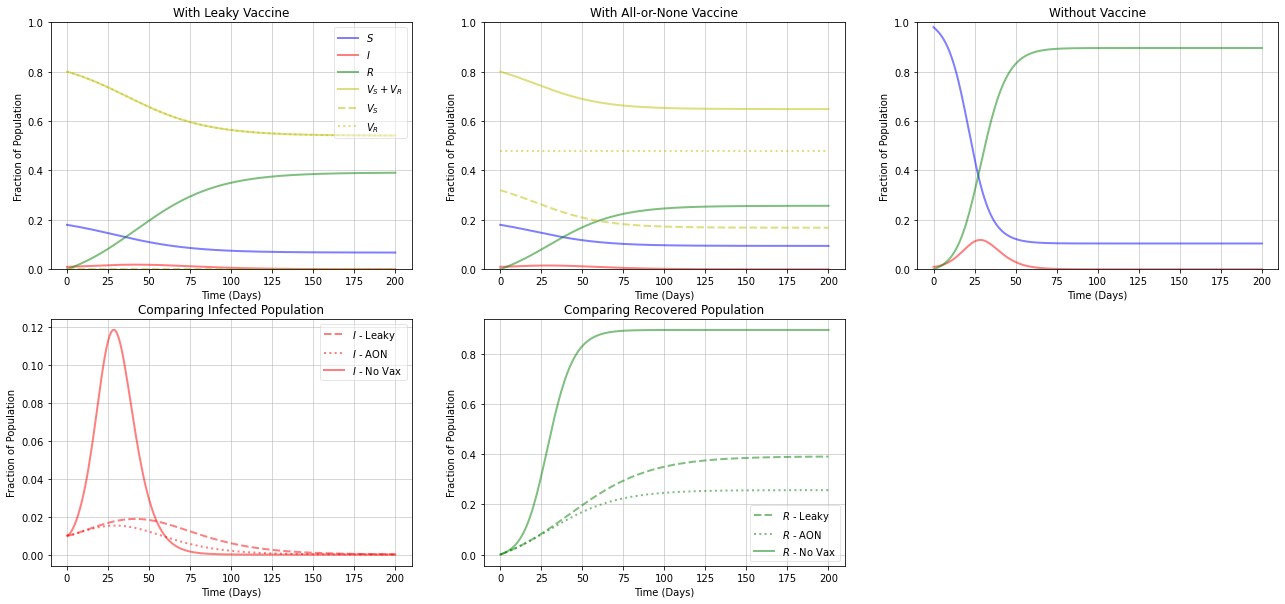

In [11]:
### run model
# set parameters
fv = fc * 0.8; s0_vax = 0.98 - fv

# leaky
vs0_leaky = 0; vr0_leaky = fv; y0_leaky = [s0_vax, vs0_leaky, vr0_leaky, e0, i0, r0]
sim_leaky = run_modified_seir(y0_leaky, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
vs0_aon = fv*(1-eps); vr0_aon = fv*eps; y0_aon = [s0_vax, vs0_aon, vr0_aon, e0, i0, r0]
sim_aon = run_modified_seir(y0_aon, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_pre_below')

### Coverage Slightly Above $f^*_V$

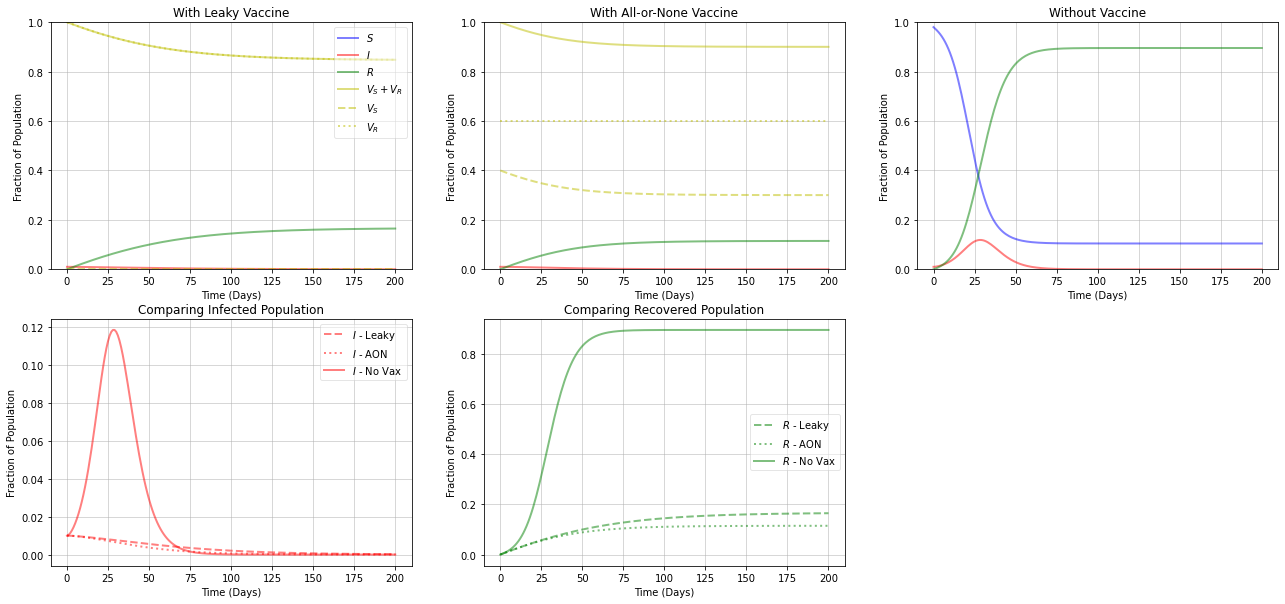

In [12]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.8); s0_vax = 0.98 - fv

# leaky
vs0_leaky = 0; vr0_leaky = fv; y0_leaky = [s0_vax, vs0_leaky, vr0_leaky, e0, i0, r0]
sim_leaky = run_modified_seir(y0_leaky, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
vs0_aon = fv*(1-eps); vr0_aon = fv*eps; y0_aon = [s0_vax, vs0_aon, vr0_aon, e0, i0, r0]
sim_aon = run_modified_seir(y0_aon, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_pre_slabove')

### Coverage Above $f^*_V$

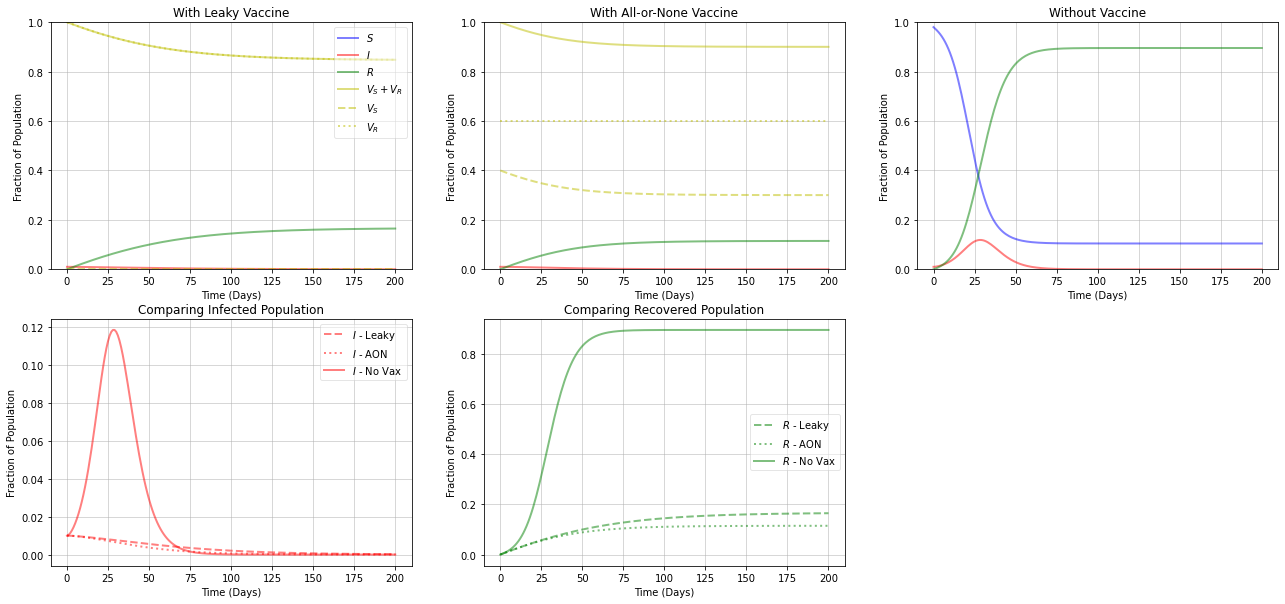

In [13]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.5); s0_vax = 0.98 - fv

# leaky
vs0_leaky = 0; vr0_leaky = fv; y0_leaky = [s0_vax, vs0_leaky, vr0_leaky, e0, i0, r0]
sim_leaky = run_modified_seir(y0_leaky, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
vs0_aon = fv*(1-eps); vr0_aon = fv*eps; y0_aon = [s0_vax, vs0_aon, vr0_aon, e0, i0, r0]
sim_aon = run_modified_seir(y0_aon, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_pre_above')

## 10-Days Post-transmission Vaccination

In [14]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6
t = np.linspace(0, 200, 201); tv = 10

# set initial conditions
s0 = 0.98; vs0 = 0; vr0 = 0; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]; y0_vax = [s0, vs0, vr0, e0, i0, r0]

# no vaccination
sim = odeint(seir, y0, t, args=(beta, sigma, gamma))
sim = sim.T

# find fc
simr = odeint(seir, y0, np.linspace(0, tv, tv+1), args=(beta, sigma, gamma))
sr, _, _, _ = simr.T
fr = 1 - sr[-1]

fc = 1/eps * (1 - 1/2.5*(1 - fr))

### Coverage Below $f^*_V$

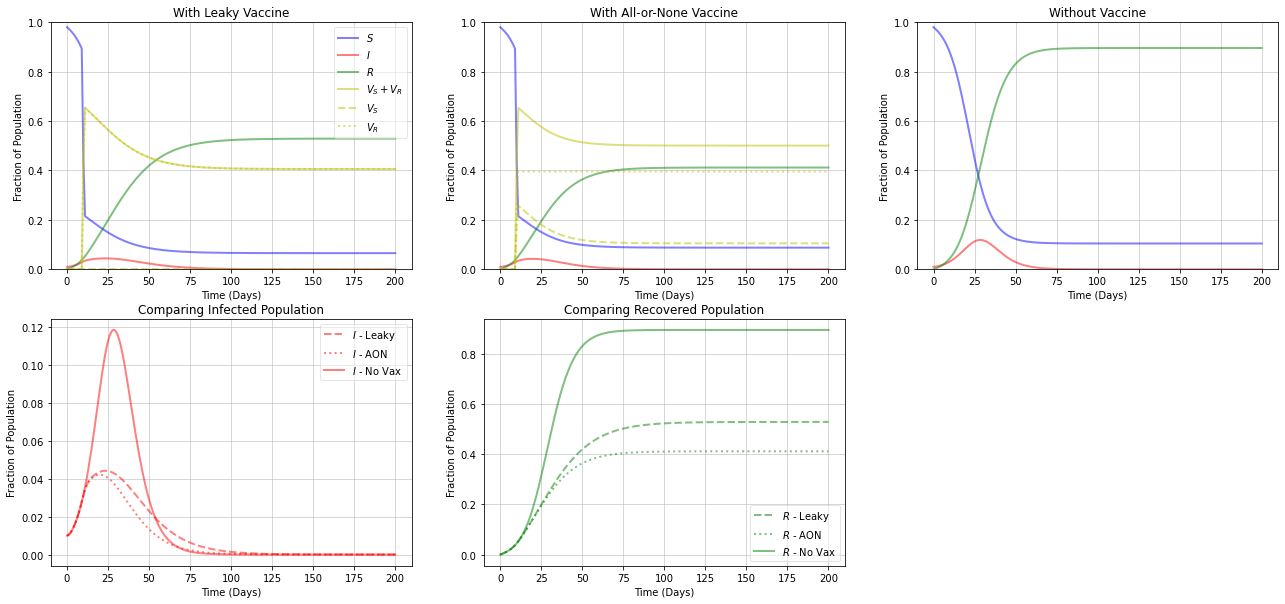

In [15]:
### run model
# set parameters
fv = fc * 0.8

# leaky
sim_leaky = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_post10_below')

### Slightly Above $f^*_V$

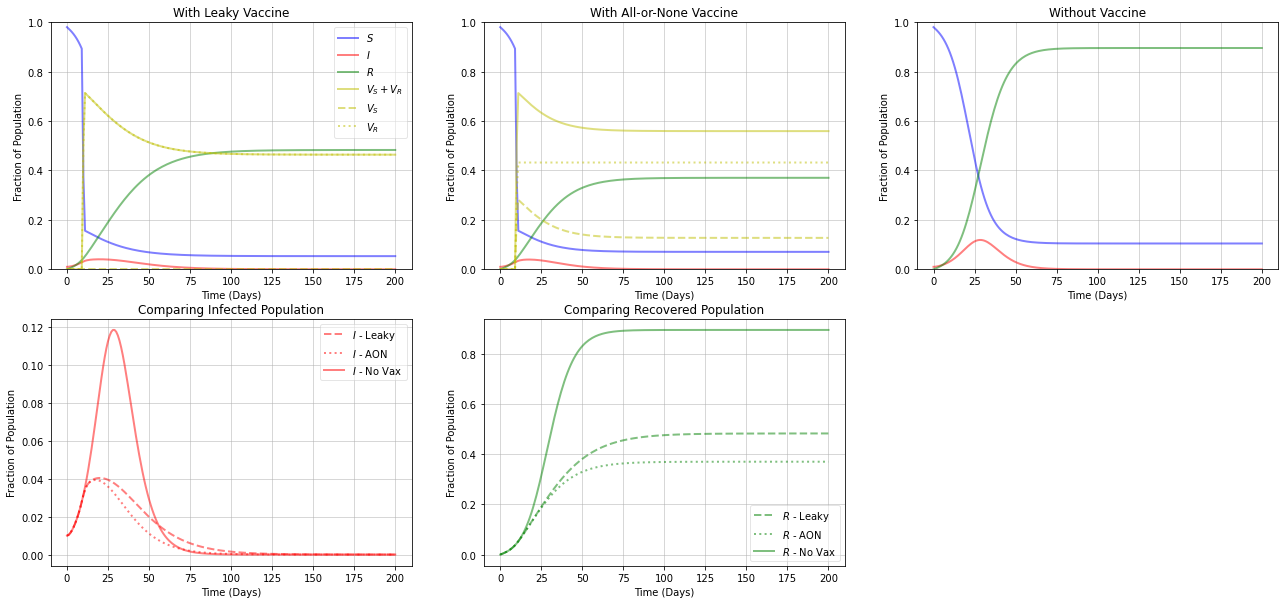

In [16]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.8)

# leaky
sim_leaky = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_post10_slabove')

### Above $f^*_V$

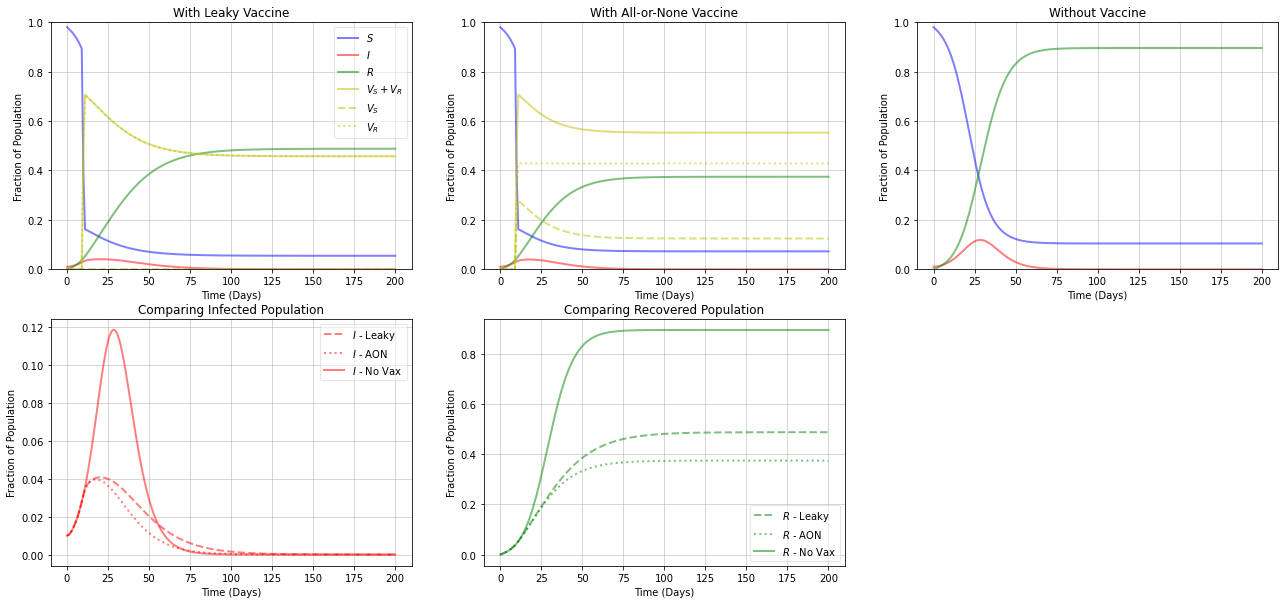

In [17]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.5)

# leaky
sim_leaky = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_post10_above')

## 30 Days Post-transmission Vaccination

In [18]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6
t = np.linspace(0, 200, 201); tv = 30

# set initial conditions
s0 = 0.98; vs0 = 0; vr0 = 0; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]; y0_vax = [s0, vs0, vr0, e0, i0, r0]

# no vaccination
sim = odeint(seir, y0, t, args=(beta, sigma, gamma))
sim = sim.T

# find fc
simr = odeint(seir, y0, np.linspace(0, tv, tv+1), args=(beta, sigma, gamma))
sr, _, _, _ = simr.T
fr = 1 - sr[-1]

fc = 1/eps * (1 - 1/2.5*(1 - fr))

### Coverage Below $f^*_V$

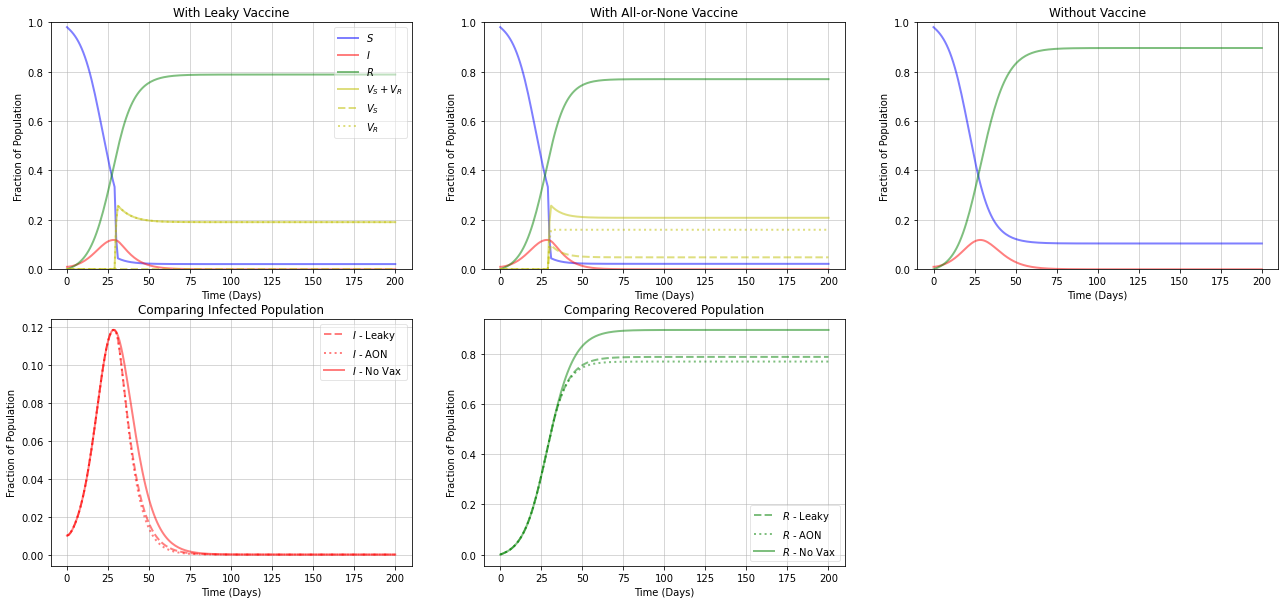

In [19]:
### run model
# set parameters
fv = fc * 0.8

# leaky
sim_leaky = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_post30_below')

### Coverage Slightly Above $f^*_V$

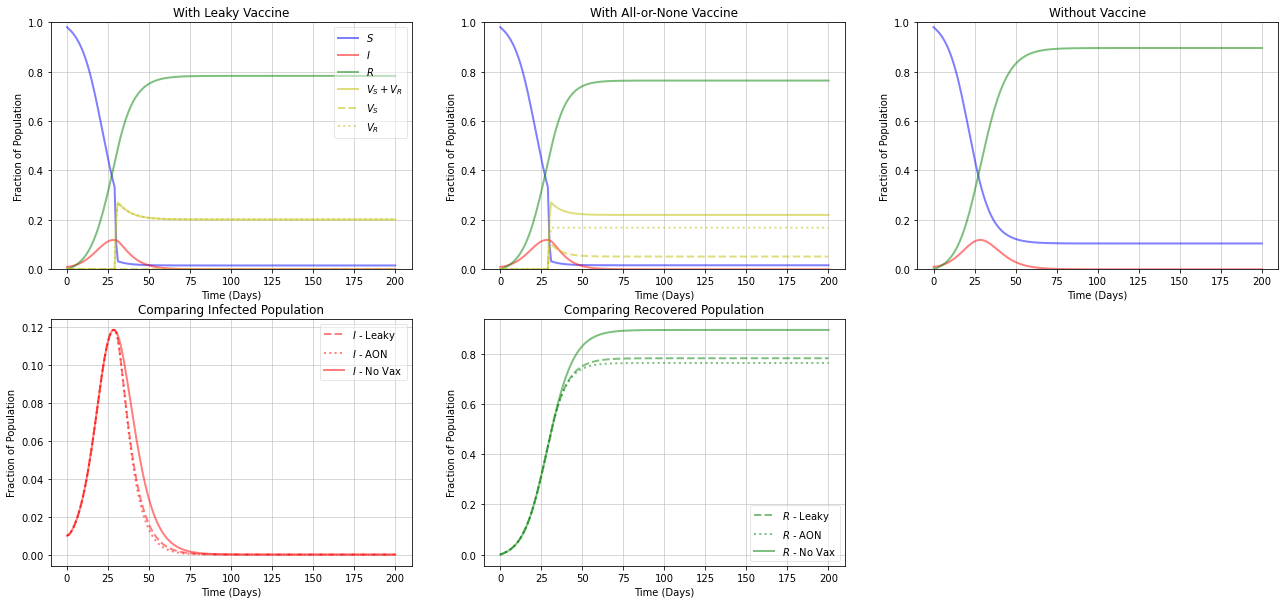

In [20]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.8)

# leaky
sim_leaky = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_post30_slabove')

### Coverage Above $f^*_V$

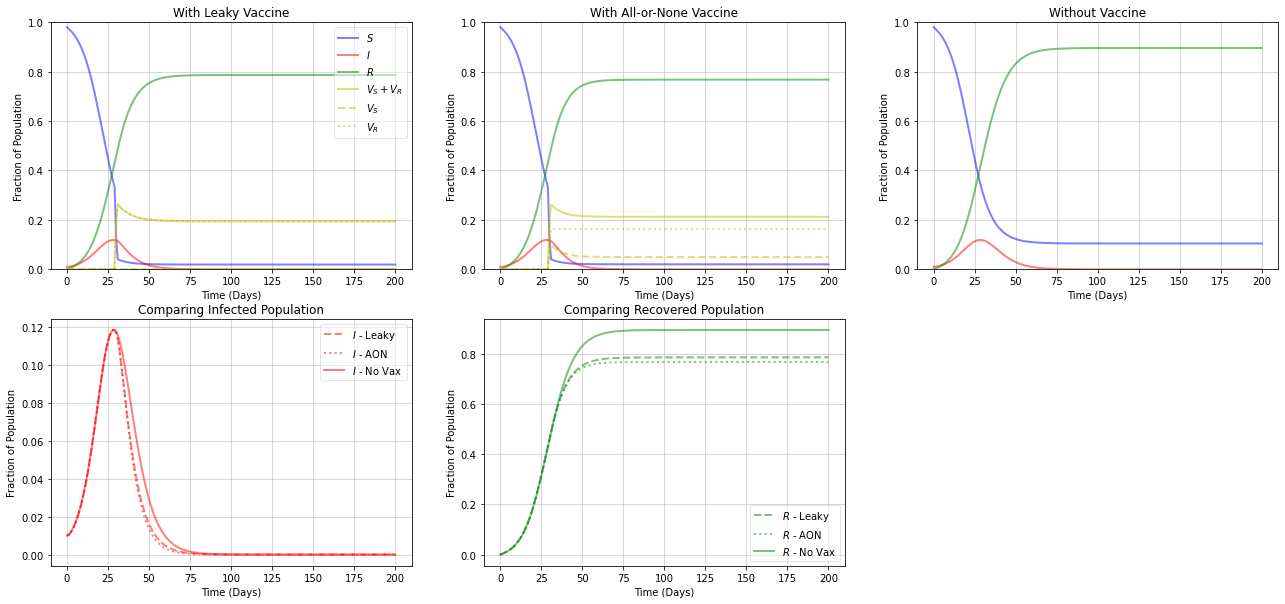

In [21]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.5)

# leaky
sim_leaky = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon = run_modified_seir(y0_vax, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky, sim_aon, savefig=True, filename='timeseries_post30_above')

## Summary

To compare the differences more effectively, below is a figure that follows the dynamics of just the recovered population over time for each regime.

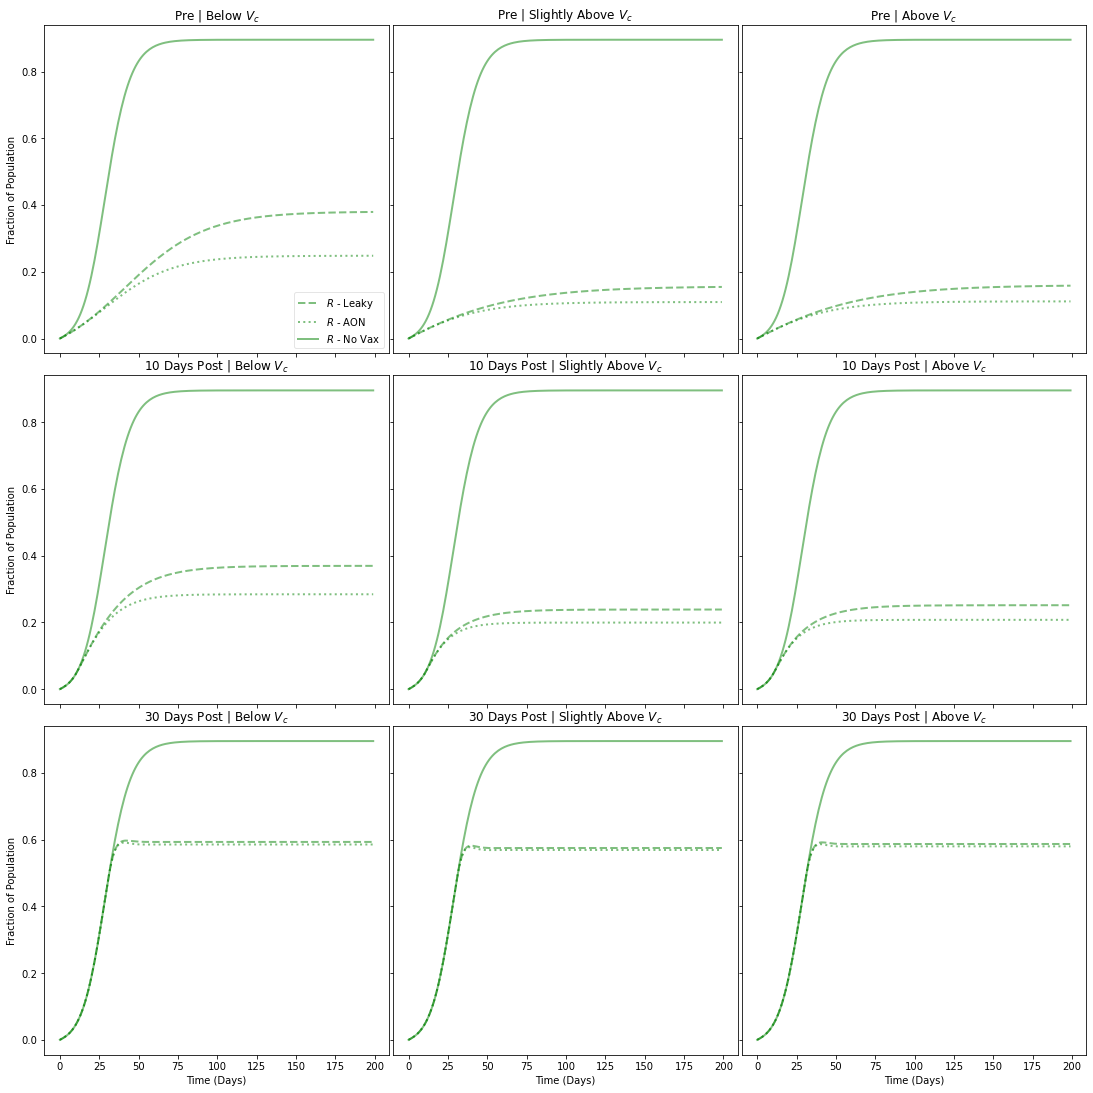

In [30]:
fig, axes = plt.subplots(3,3, facecolor='w', figsize=(15,15), sharex=True, sharey=True, gridspec_kw=dict(width_ratios=[1,1,1]))
#norm = plt.Normalize(np.min(np.log(pre_plot_diff_below+1)), np.max(np.log(pre_plot_diff_below+1)))

# Pre-transmission 
axes[0,0].plot(t, r_leaky_pre_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,0].plot(t, r_aon_pre_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,0].set_title('Pre | Below $V_c$')
axes[0,0].set_ylabel('Fraction of Population')
legend = axes[0,0].legend(); legend.get_frame().set_alpha(0.5)

axes[0,1].plot(t, r_leaky_pre_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,1].plot(t, r_aon_pre_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,1].set_title('Pre | Slightly Above $V_c$')

#ax3 = fig.add_subplot(133)
axes[0,2].plot(t, r_leaky_pre_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,2].plot(t, r_aon_pre_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,2].set_title('Pre | Above $V_c$')

# 10 days post-transmission
axes[1,0].plot(t, r_leaky_post10_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,0].plot(t, r_aon_post10_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,0].set_title('10 Days Post | Below $V_c$')
axes[1,0].set_ylabel('Fraction of Population')

axes[1,1].plot(t, r_leaky_post10_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,1].plot(t, r_aon_post10_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,1].set_title('10 Days Post | Slightly Above $V_c$')

axes[1,2].plot(t, r_leaky_post10_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,2].plot(t, r_aon_post10_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,2].set_title('10 Days Post | Above $V_c$')

# 30 days post-transmission
axes[2,0].plot(t, r_leaky_post30_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,0].plot(t, r_aon_post30_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,0].set_title('30 Days Post | Below $V_c$')
axes[2,0].set_ylabel('Fraction of Population')
axes[2,0].set_xlabel('Time (Days)')

axes[2,1].plot(t, r_leaky_post30_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,1].plot(t, r_aon_post30_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,1].set_title('30 Days Post | Slightly Above $V_c$')
axes[2,1].set_xlabel('Time (Days)')

axes[2,2].plot(t, r_leaky_post30_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,2].plot(t, r_aon_post30_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,2].set_title('30 Days Post | Above $V_c$')
axes[2,2].set_xlabel('Time (Days)')

fig.tight_layout(pad=0.05)
#cb = fig.colorbar(mappable=proj, ax=axes, fraction=0.02, shrink=0.5)
#cb.ax.set_yticklabels(np.round(np.exp(np.linspace(0.0, 4.2, 8))))
#plt.savefig('VE vs R0 2D Contour Plot', bbox_inches='tight')
plt.show()